# Nike - Adidas - Converse Image Classification with ResNet50V2

<p style="text-align:center;"><img src="https://i0.wp.com/straatosphere.com/wp-content/uploads/2017/06/Pride.jpg?resize=394%2C218&ssl=1" alt="Girl in a jacket" width="500" height="600" class="center"></p>

### Dataset
The dataset contains 2 folders: one with the test data and the other one with train data.
The test-train-split ratio is 0.14, with the test dataset containing 114 images and the train dataset containing 711.
The images have a resolution of 240x240 pixels in RGB color model.
Both the folders contain 3 classes:

Adidas
Converse
Nike

### The Project

This project is focused on image classification of Nike-Adidas-Converse shoes. It uses feature-extraction and fine tuning by using a pre-trained model which is ResNet50V2. It reaches over 80% of prediction accuracy. The image data is augmented and shuffled during the process and also they are visualized to provide a clear aspect of approach. Some built-in functions are used to create a better performance and visualization

In [119]:
import os 

#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/nike-adidas-and-converse-imaged"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in /kaggle/input/nike-adidas-and-converse-imaged
There are 3 directories and 0 images in /kaggle/input/nike-adidas-and-converse-imaged/test
There are 0 directories and 38 images in /kaggle/input/nike-adidas-and-converse-imaged/test/converse
There are 0 directories and 38 images in /kaggle/input/nike-adidas-and-converse-imaged/test/nike
There are 0 directories and 38 images in /kaggle/input/nike-adidas-and-converse-imaged/test/adidas
There are 3 directories and 0 images in /kaggle/input/nike-adidas-and-converse-imaged/train
There are 0 directories and 237 images in /kaggle/input/nike-adidas-and-converse-imaged/train/converse
There are 0 directories and 237 images in /kaggle/input/nike-adidas-and-converse-imaged/train/nike
There are 0 directories and 237 images in /kaggle/input/nike-adidas-and-converse-imaged/train/adidas


#### Alternative way to see how many images we do have 

In [120]:
num_nike_images_train = len(os.listdir("/kaggle/input/nike-adidas-and-converse-imaged/train/nike"))
num_nike_images_train

237

#### Get the class names programatically

In [121]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/kaggle/input/nike-adidas-and-converse-imaged/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['adidas' 'converse' 'nike']


#### Lets visualize the images

In [122]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

#### Viewing a random image 

Image shape: (240, 240, 3)


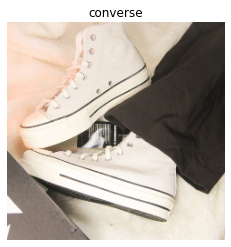

In [123]:
img = view_random_image(target_dir = "/kaggle/input/nike-adidas-and-converse-imaged/train/",
                        target_class = "converse") # or we can write nike instead of converse to see converse examples

In [124]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(240, 240, 3)

#### Randomly visualize the data

Image shape: (240, 240, 3)
Image shape: (240, 240, 3)
Image shape: (240, 240, 3)


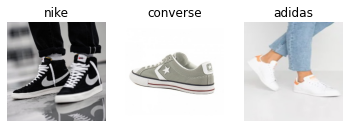

In [125]:
plt.figure()
plt.subplot(1,3,1)
steak_image = view_random_image("/kaggle/input/nike-adidas-and-converse-imaged/train/", "nike")
plt.subplot(1,3,2)
pizza_image = view_random_image("/kaggle/input/nike-adidas-and-converse-imaged/train/", "converse")
plt.subplot(1,3,3)
pizza_image = view_random_image("/kaggle/input/nike-adidas-and-converse-imaged/train/", "adidas")

<div class="alert alert-block alert-info"> 📌  Note that the data is already splittid to test and train datasets.</div>

#### Define directory paths

In [126]:
train_dir = "/kaggle/input/nike-adidas-and-converse-imaged/train/"
test_dir = "/kaggle/input/nike-adidas-and-converse-imaged/test/"

#### Augment the data from training directory

In [127]:
print("Augmented training data")
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (240,240),
                                                                  batch_size = 32,
                                                                  class_mode = "categorical",
                                                                  shuffle=False)

#Create non augmented train data batches
print("Non augmented trainin data")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (240,240),
                                               class_mode = "categorical",
                                               shuffle = False)

#Create non aumented test data batches
print("Non augmented test data")
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size= 32,
                                               target_size= (240,240),
                                               class_mode = "categorical")

Augmented training data
Found 711 images belonging to 3 classes.
Non augmented trainin data
Found 711 images belonging to 3 classes.
Non augmented test data
Found 114 images belonging to 3 classes.


#### Getting sample data batches 

In [128]:
images, labels = train_data.next()
augmented_images, augmented_labels =train_data_augmented.next()
len(images)

32

#### Lets see an original image and augmented image randomly

 Showing image num: 11


(-0.5, 239.5, 239.5, -0.5)

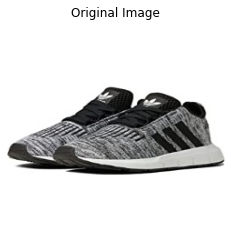

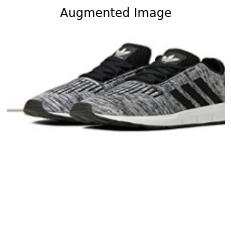

In [129]:
import random
random_number = random.randint(0,31)
print(f" Showing image num: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

#### Let's shuffle the augmented images

In [130]:
print("Shuffled Augmented training data")
train_data_augmented_shuffled= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (240,240),
                                                                  batch_size = 32,
                                                                  class_mode = "categorical",
                                                                  shuffle=True)

shuffled_augmented_images, shuffled_augmented_labels =train_data_augmented.next()

Shuffled Augmented training data
Found 711 images belonging to 3 classes.


#### Lets see an original image and a shuffled&augmented image randomly

 Showing image num: 5


(-0.5, 239.5, 239.5, -0.5)

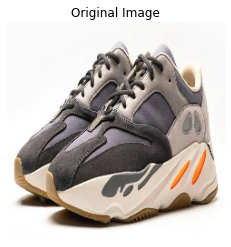

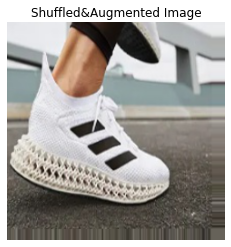

In [131]:
import random
random_number = random.randint(0,31)
print(f" Showing image num: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(shuffled_augmented_images[random_number])
plt.title("Shuffled&Augmented Image")
plt.axis(False)

### Building the Model

In [132]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [133]:
# 1. Create a base model with tf.keras.applications

base_model = tf.keras.applications.ResNet50V2(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(240,240,3), name = "input-layer")

#4. Rescaling
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(3, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 10. Fit the model and save its history
history = model_0.fit(train_data_augmented_shuffled,
                                 epochs=20,
                                 steps_per_epoch = len(train_data),
                                 validation_data = test_data,
                                 validation_steps = int(0.25*len(test_data)),)

Shape after passing inputs through base model: (None, 8, 8, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/20
23/23 [==============================] - 14s 511ms/step - loss: 1.0392 - accuracy: 0.5007 - val_loss: 0.9155 - val_accuracy: 0.6562
Epoch 2/20
23/23 [==============================] - 10s 443ms/step - loss: 0.7314 - accuracy: 0.7032 - val_loss: 0.8066 - val_accuracy: 0.6250
Epoch 3/20
23/23 [==============================] - 10s 446ms/step - loss: 0.6281 - accuracy: 0.7665 - val_loss: 0.7216 - val_accuracy: 0.6562
Epoch 4/20
23/23 [==============================] - 11s 465ms/step - loss: 0.5567 - accuracy: 0.7792 - val_loss: 0.4432 - val_accuracy: 0.9062
Epoch 5/20
23/23 [==============================] - 10s 438ms/step - loss: 0.5177 - accuracy: 0.8115 - val_loss: 0.4948 - val_accuracy: 0.8125
Epoch 6/20
23/23 [==============================] - 11s 462ms/step - loss: 0.4873 - accuracy: 0.8143 - val_loss: 0.4975 - val_accuracy: 0.8438
Epoch 7/20
23/23 [=========

#### Plotting the loss and acc curves separately to make them more clear

In [134]:

def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

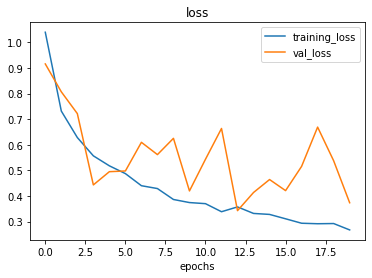

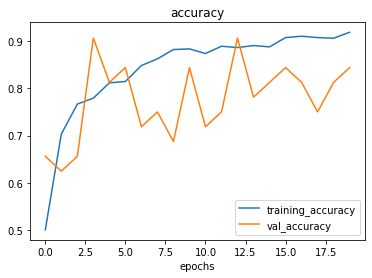

In [135]:
plot_loss_curves(history)

#### Starting the fine-tuning

In [136]:
# To begin fine-tuning lets start by setting the last 10 layers as trainable

base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to compile model every time there is a change)
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), # when fine-tuning you typically want to lower lr by 10x
                 metrics = ["accuracy"] )

In [137]:
model_0.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input-layer (InputLayer)     [(None, 240, 240, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, None, None, 2048)  23564800  
_________________________________________________________________
global_average_pooling_layer (None, 2048)              0         
_________________________________________________________________
output-layer (Dense)         (None, 3)                 6147      
Total params: 23,570,947
Trainable params: 3,422,211
Non-trainable params: 20,148,736
_________________________________________________________________


In [138]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_0.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [139]:
# Now we have unfrozen some of the layers on the top 
print(len(model_0.trainable_variables))

11


#### Fine tune for another 5 epochs

In [140]:
initial_epochs = 20
fine_tune_epochs = initial_epochs + 5

# Refit the model
history_2 = model_0.fit(train_data_augmented_shuffled,
                                               epochs = fine_tune_epochs,
                                               validation_data = test_data,
                                               validation_steps = int(0.25*len(test_data)),
                                               initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 20/25
23/23 [==============================] - 15s 513ms/step - loss: 0.3286 - accuracy: 0.8720 - val_loss: 0.6446 - val_accuracy: 0.7812
Epoch 21/25
23/23 [==============================] - 10s 439ms/step - loss: 0.2034 - accuracy: 0.9409 - val_loss: 0.5863 - val_accuracy: 0.7188
Epoch 22/25
23/23 [==============================] - 10s 437ms/step - loss: 0.1827 - accuracy: 0.9409 - val_loss: 0.3578 - val_accuracy: 0.8438
Epoch 23/25
23/23 [==============================] - 10s 440ms/step - loss: 0.1409 - accuracy: 0.9606 - val_loss: 0.7051 - val_accuracy: 0.7500
Epoch 24/25
23/23 [==============================] - 11s 475ms/step - loss: 0.1211 - accuracy: 0.9620 - val_loss: 0.3360 - val_accuracy: 0.8750
Epoch 25/25
23/23 [==============================] - 11s 466ms/step - loss: 0.0956 - accuracy: 0.9789 - val_loss: 0.2634 - val_accuracy: 0.9062


In [141]:
model_0.evaluate(test_data)

4/4 [==============================] - 0s 78ms/step - loss: 0.4727 - accuracy: 0.8421


[0.4727291166782379, 0.8421052694320679]

#### A function to compare training histories

In [142]:
# Lets create a function to compare training histories
def compare_histories(original_history, new_history, initial_epochs = 20):
  """
  Compares two TensorFlow history objects
  """
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new one
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make pllot accuracy
  plt.figure(figsize = (8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label = "Training Accuracy")
  plt.plot(total_val_acc, label = "Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start fine tuning")
  plt.legend(loc = "lower right")
  plt.title("Training and Validation Accuracy")

  # Make plot loss
  plt.figure(figsize = (8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label = "Training Loss")
  plt.plot(total_val_loss, label = "Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start fine tuning")
  plt.legend(loc = "upper right")
  plt.title("Training and Validation Loss")

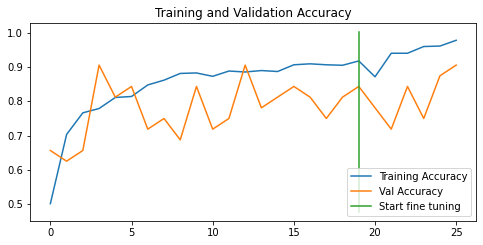

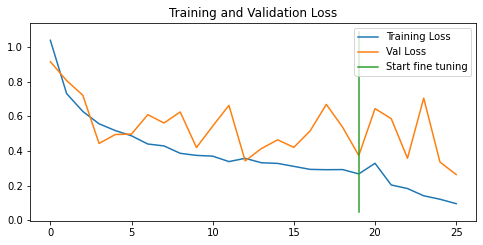

In [143]:
compare_histories(history,
                  history_2)

In [144]:
# Make predictions with the model_0
y_probs = model_0.predict(test_data)

# See first 5 predictions
y_probs[:5]

array([[6.2216330e-01, 3.4856769e-01, 2.9269006e-02],
       [1.5921196e-01, 3.7782756e-03, 8.3700973e-01],
       [2.1980319e-04, 9.9815649e-01, 1.6237091e-03],
       [9.9838495e-01, 2.4430532e-04, 1.3707221e-03],
       [3.8113954e-05, 1.7955474e-03, 9.9816638e-01]], dtype=float32)

#### Converting all predictions probabilites into integers 

In [145]:
y_preds = y_probs.argmax(axis = 1)

# See first 5 prediction labels
y_preds[:10]

array([0, 2, 1, 0, 2, 2, 0, 2, 1, 1])

#### Conclusion

**84**% of prediction accuracy is reached on the augmented and shuffled data. A pre-trained model (ResNet50V2) is used and after unfreezing top 10 layers of that model, it is fine tuned for 5 epochs.

If you find it beneficial, please upvote.
Thanks, Emre Cicekyurt